Información del DataFrame (sin columnas ignoradas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   gidenpac                       489 non-null    category
 1   itipsexo                       489 non-null    category
 2   fllegada                       489 non-null    category
 3   gsitalta                       489 non-null    category
 4   iotrocen                       489 non-null    category
 5   gdiagalt                       489 non-null    category
 6   ds_izq_der                     489 non-null    category
 7   ds_turno                       489 non-null    category
 8   ds_edad                        489 non-null    int64   
 9   ds_estancia                    489 non-null    int64   
 10  ds_pre_oper                    489 non-null    int64   
 11  ds_post_oper                   489 non-null  

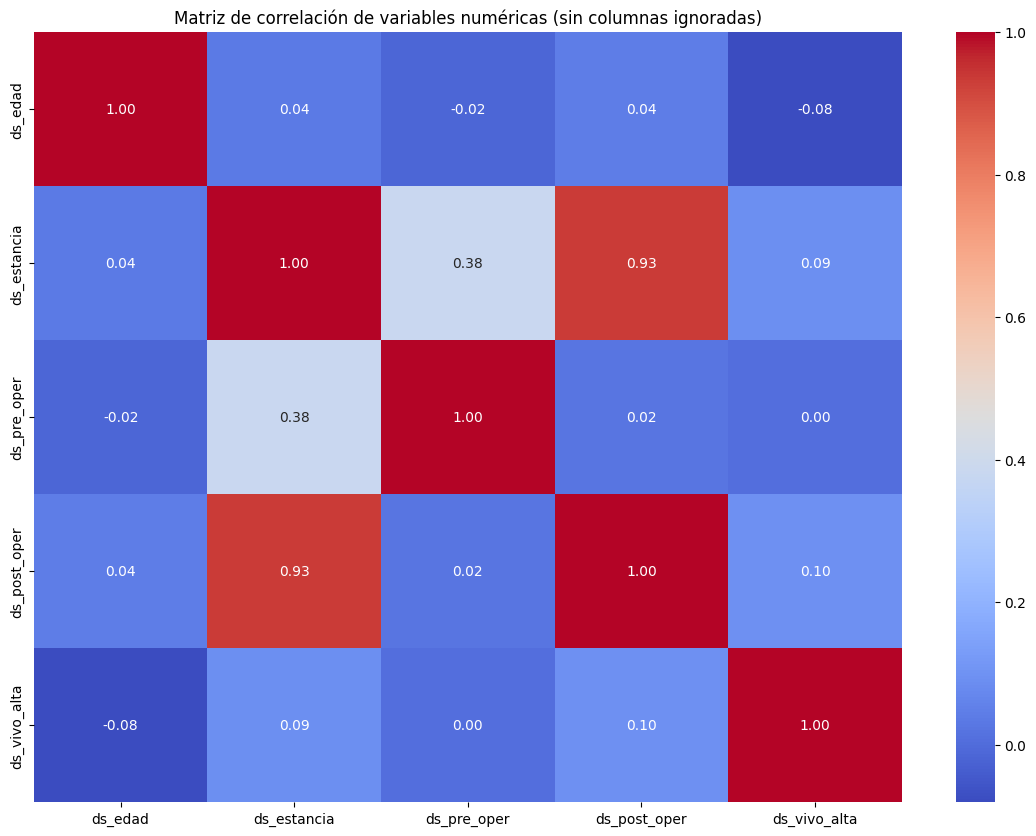

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset preprocesado
#df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')
df = pd.read_csv('/home/ubuntu/STG-fractura_cadera/2025_02/preprocesado/DATOS_PREPROCESADOS_2_2022-2024.csv')

# Eliminar filas que contengan "-999" o -999 en cualquier columna
df = df[~df.isin(["-999", -999]).any(axis=1)]

# Lista de columnas que NO se quieren convertir a categoría (se mantendrán como numéricas)
numeric_features = ['ds_edad', 'ds_estancia', 'ds_pre_oper', 'ds_post_oper', 'ds_vivo_alta']

# Convertir todas las columnas que NO estén en numeric_features a tipo 'category'
for col in df.columns:
    if col not in numeric_features:
        df[col] = df[col].astype('category')

# --- Análisis Exploratorio de Datos (EDA) ---

# Definir las columnas a ignorar en el análisis (en este ejemplo, no se ignora ninguna)
cols_to_ignore = []

# Crear un DataFrame para el análisis, eliminando las columnas a ignorar
df_analysis = df.drop(columns=cols_to_ignore)

# Información general del DataFrame (sin las columnas ignoradas)
print("Información del DataFrame (sin columnas ignoradas):")
df_analysis.info()

print("\nEstadísticas descriptivas:")
print(df_analysis.describe())

# Verificar la existencia de valores nulos en el DataFrame de análisis
print("\nValores nulos por columna:")
print(df_analysis.isnull().sum())

# Matriz de correlación para las variables numéricas del DataFrame de análisis
plt.figure(figsize=(14, 10))
correlation_matrix = df_analysis.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas (sin columnas ignoradas)")
plt.show()


Matriz de correlaciones entre variables categóricas (Cramér's V):
                               itipsexo  fllegada  gsitalta  iotrocen  \
itipsexo                       0.994539  0.938495  0.138266  0.008952   
fllegada                       0.938495  1.000000  0.869253  0.900746   
gsitalta                       0.138266  0.869253  1.000000  0.043593   
iotrocen                       0.008952  0.900746  0.043593  0.943403   
gdiagalt                       0.239612  0.963157  0.114356  0.094604   
ds_izq_der                     0.062616  0.923819  0.097444  0.030149   
ds_turno                       0.060366  0.937575  0.061065  0.077007   
ds_dia_semana_llegada          0.073968  1.000000  0.119842  0.078968   
ds_mes_llegada                 0.115234  1.000000  0.156079  0.145625   
ds_centro_afueras              0.013715  0.926894  0.095994  0.000000   
ds_alergia_medicamentosa       0.084868  0.927521  0.126166  0.000000   
ds_alergia_alimenticia         0.006078  0.955472  0.04600

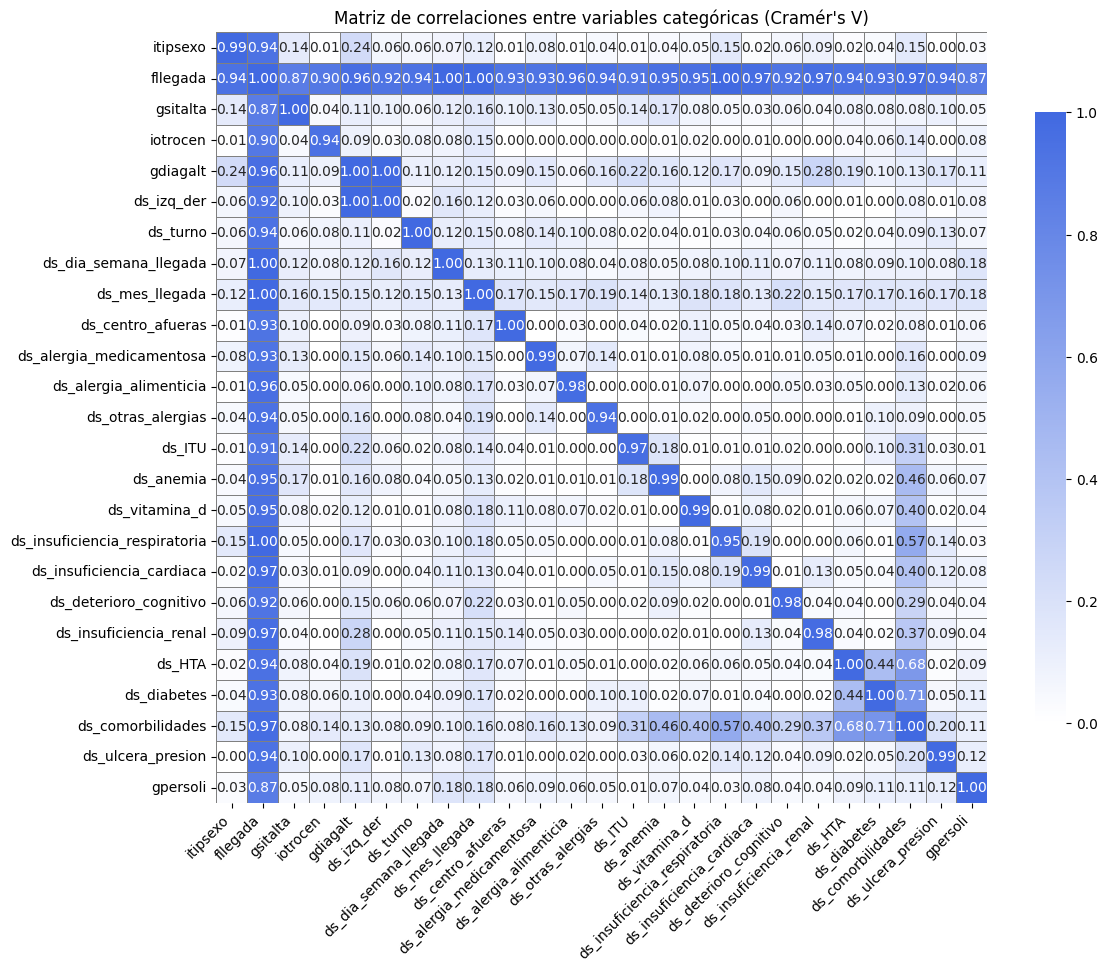

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Asegúrate de tener cargado tu DataFrame 'df', por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Eliminamos la columna 'gidenpac' si existe en el DataFrame
if 'gidenpac' in df.columns:
    df = df.drop(columns=['gidenpac'])

# Función para calcular Cramér's V a partir de una tabla de contingencia
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Crear una matriz para almacenar los valores de Cramér's V
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Calcular Cramér's V para cada par de variables categóricas
for col1 in cat_cols:
    for col2 in cat_cols:
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

print("Matriz de correlaciones entre variables categóricas (Cramér's V):")
print(cramers_v_matrix)

# Crear un colormap personalizado que inicie en blanco para 0 y se intensifique hasta 'royalblue'
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["white", "royalblue"])

# Visualizar la matriz con un heatmap mejorado, mostrando 2 decimales en la anotación
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, fmt=".2f", cmap=cmap, vmin=0, vmax=1,
            linewidths=0.5, linecolor='grey', square=True, cbar_kws={"shrink": .75})
plt.title("Matriz de correlaciones entre variables categóricas (Cramér's V)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2313/4166127590.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]


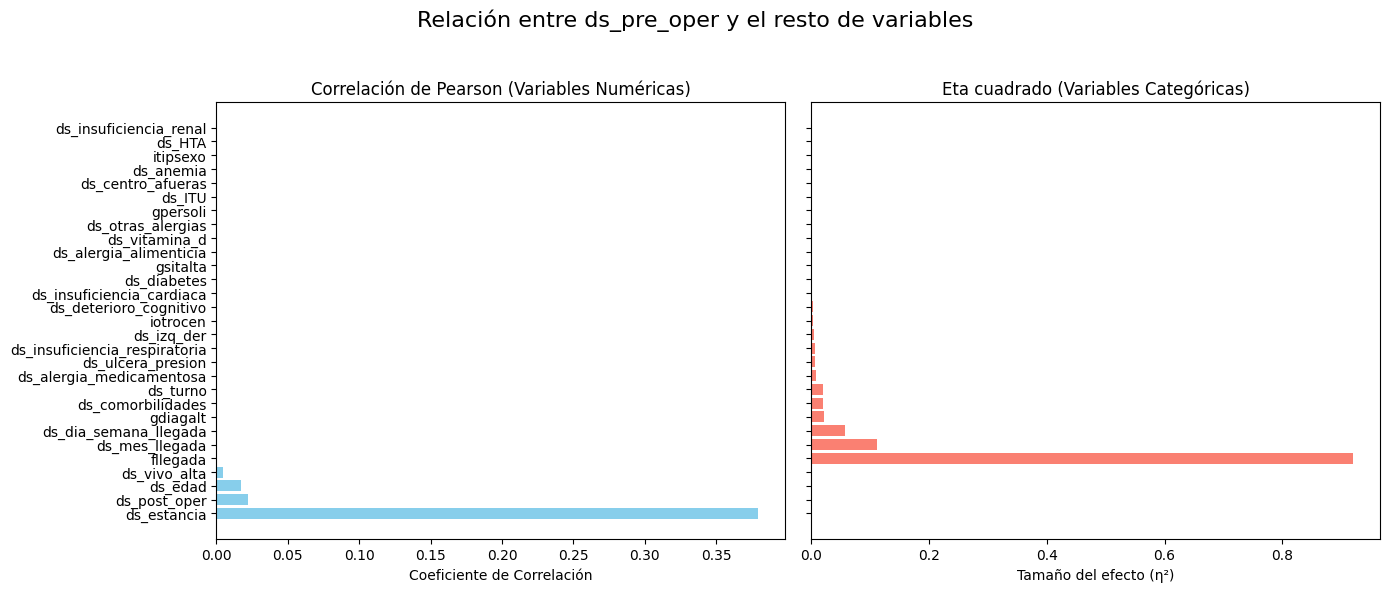

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir ds_pre_oper a numérico (en caso de que no lo sea)
df['ds_pre_oper'] = pd.to_numeric(df['ds_pre_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_pre_oper' in num_cols:
    num_cols.remove('ds_pre_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_pre_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_pre_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_pre_oper y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_2313/347188812.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]


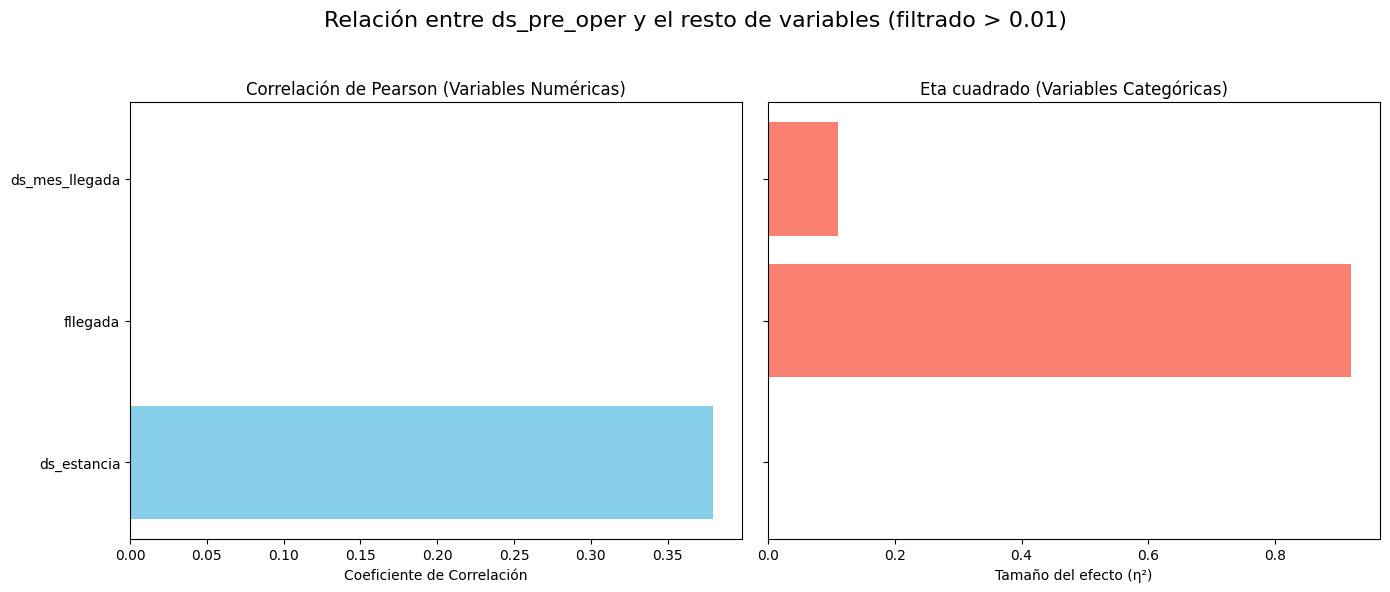

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir ds_pre_oper a numérico (en caso de que no lo sea)
df['ds_pre_oper'] = pd.to_numeric(df['ds_pre_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_pre_oper' in num_cols:
    num_cols.remove('ds_pre_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_pre_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_pre_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar para mostrar solo aquellas variables con valor absoluto mayor a 0.01
num_df = num_df[abs(num_df['Measure']) > 0.07]
cat_df = cat_df[cat_df['Measure'] > 0.07]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # La variable con mayor correlación aparece arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_pre_oper y el resto de variables (filtrado > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_2313/2948509305.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_post_oper'].dropna() for _, group in df.groupby(col)]


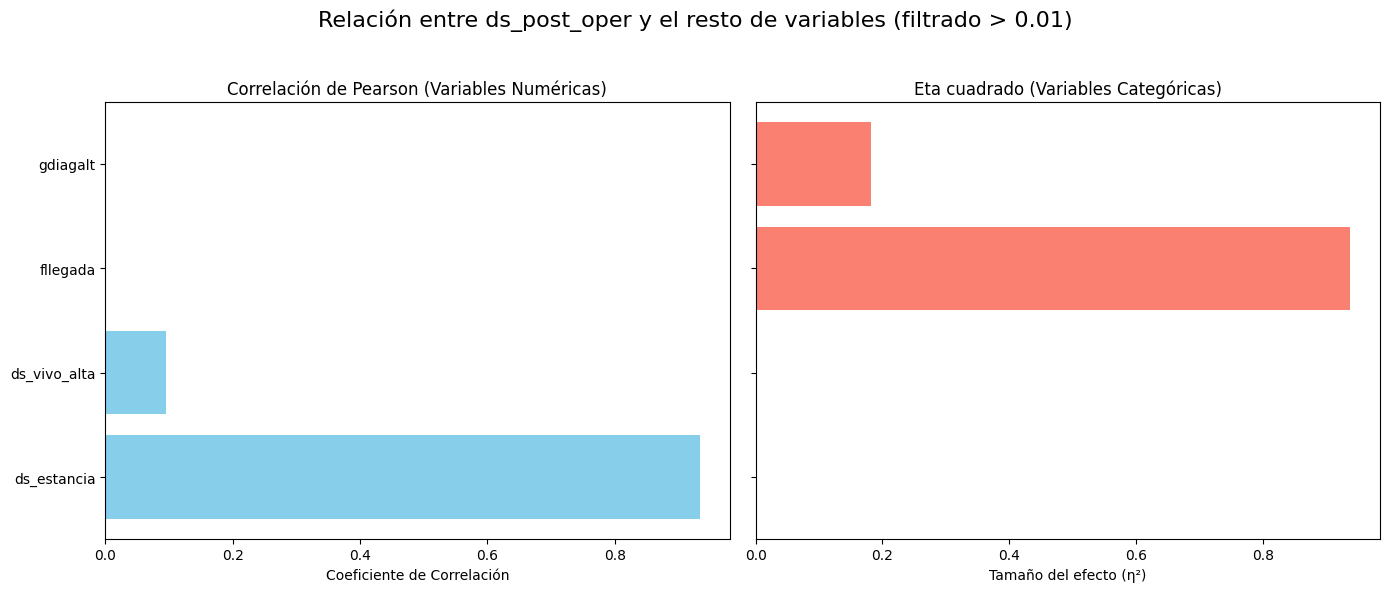

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir ds_post_oper a numérico (en caso de que no lo sea)
df['ds_post_oper'] = pd.to_numeric(df['ds_post_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_post_oper' in num_cols:
    num_cols.remove('ds_post_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_post_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_post_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_post_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar para mostrar solo aquellas variables con valor absoluto mayor a 0.01
num_df = num_df[abs(num_df['Measure']) > 0.07]
cat_df = cat_df[cat_df['Measure'] > 0.07]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # La variable con mayor correlación aparece arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_post_oper y el resto de variables (filtrado > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_2313/395389554.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]


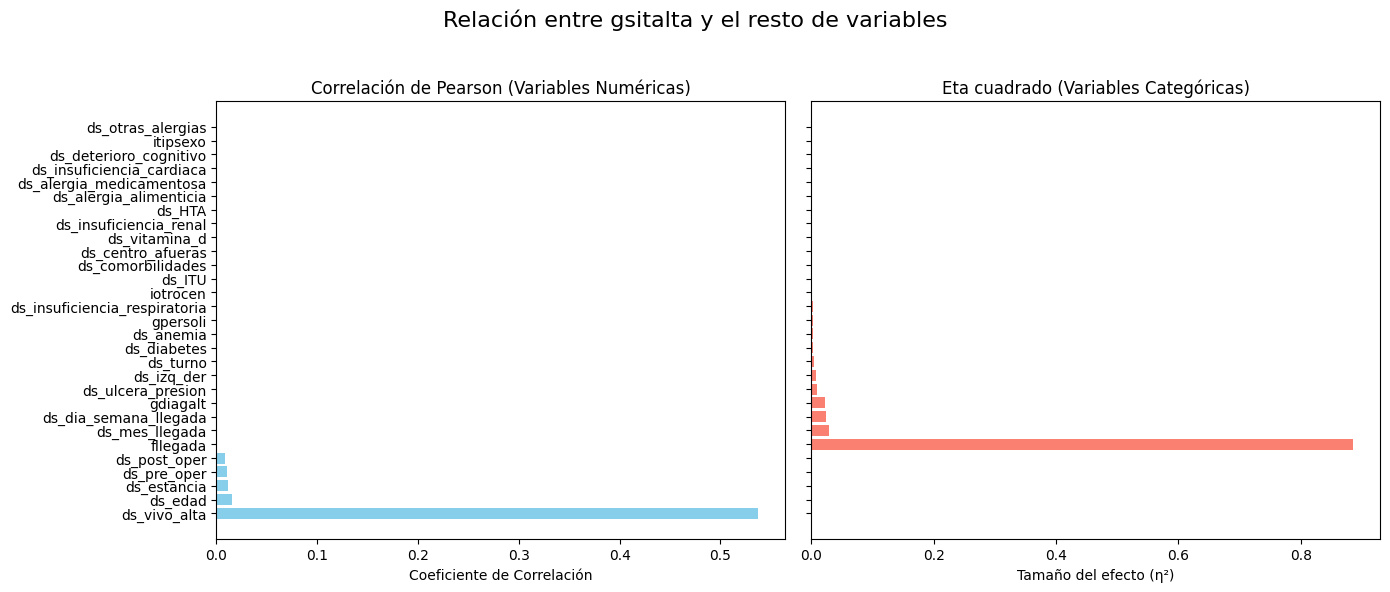

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir gsitalta a numérico (en caso de que no lo sea)
df['gsitalta'] = pd.to_numeric(df['gsitalta'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'gsitalta' in num_cols:
    num_cols.remove('gsitalta')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['gsitalta'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['gsitalta'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre gsitalta y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_2313/280042090.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]


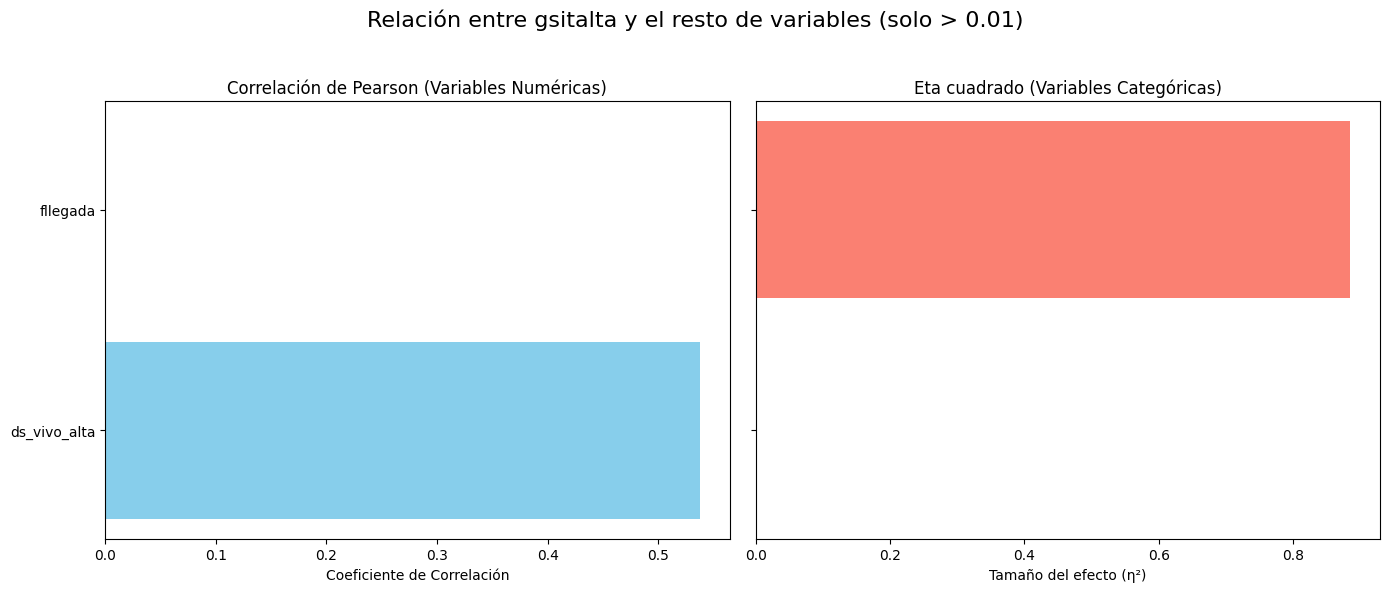

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir gsitalta a numérico (en caso de que no lo sea)
df['gsitalta'] = pd.to_numeric(df['gsitalta'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'gsitalta' in num_cols:
    num_cols.remove('gsitalta')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas respecto a gsitalta
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['gsitalta'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['gsitalta'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'
cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar para mostrar solo aquellas variables con medida mayor a 0,01
num_df = num_df[num_df['Measure'].abs() > 0.05]
cat_df = cat_df[cat_df['Measure'] > 0.05]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # La variable con mayor correlación aparecerá arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre gsitalta y el resto de variables (solo > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
